In [164]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from data_simulation import get_data
from utils import get_metrics


In [165]:
version_i = 2

In [166]:
# set seed
seed = 24
np.random.seed(seed)

# get data
d_x = 10  # number of fourier features
n_train = 10
n_test = 10000
X_train, Y_train, X_train_orig = get_data(d_x=d_x, n_data=n_train)
X_test, Y_test, X_test_orig = get_data(d_x=d_x, n_data=n_test)


# likelihood tempering

In [167]:
tempering = "likelihood"


In [168]:
lambs = [0.00001,0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,100000.0]

In [169]:
var_prior = 0.5
var_likelihood = 0.1
result = get_metrics(
    var_prior,
    var_likelihood,
    X_train,
    Y_train,
    X_train_orig,
    X_test,
    Y_test,
    X_test_orig,
    lambs,
    gammas=None,
)


1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0


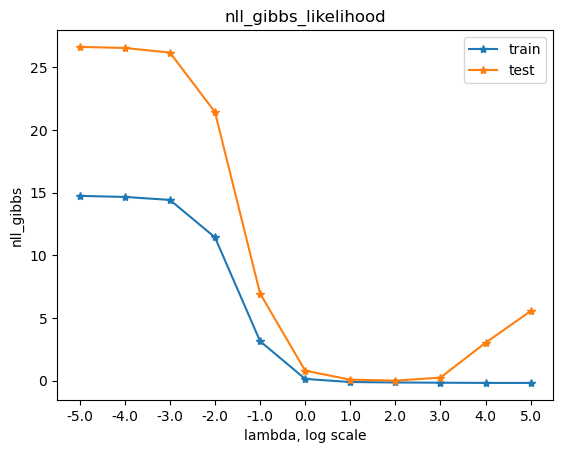

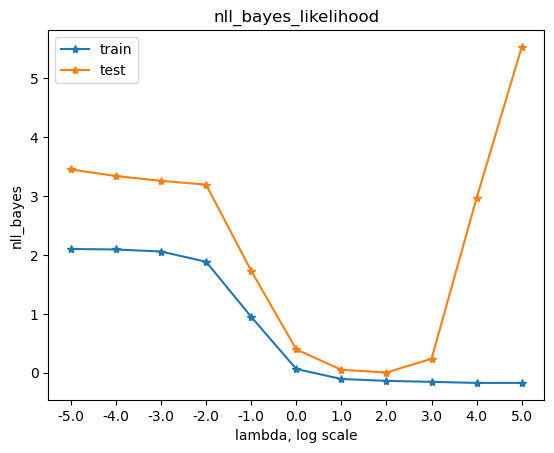

In [170]:
metric_names = ["nll_gibbs", "nll_bayes"]  # ,"mse_gibbs","mse_bayes"]
for metric_name in metric_names:
    plt.figure()
    save_name = f"{metric_name}_{tempering}"
    plt.title(save_name)
    plt.plot(
        np.arange(0, len(lambs), 1),
        result[f"{metric_name}_train"],
        marker="*",
        label="train",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result[f"{metric_name}_test"],
        marker="*",
        label="test",
    )
    # plt.plot(np.arange(0,len(lambs),1),nll_gibbs_test_1, marker="*", label=prior_scale_1)

    plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
    # plt.legend()
    if tempering == "likelihood":
        plt.xlabel("lambda, log scale")
    if tempering == "prior":
        plt.xlabel("gamma, log scale")
    plt.ylabel(metric_name)
    plt.legend()
    plt.savefig(f"./results/exact_lm_regression/main/{tempering}/{save_name}.png", dpi=300)
    plt.show()


In [171]:
result['grad_expected_gibbs']

[-631.6180419921875,
 -632.3883056640625,
 -618.050537109375,
 -419.54925537109375,
 -59.86494064331055,
 -0.7406207919120789,
 -0.009759822860360146,
 4.8594665713608265e-05,
 0.0003840401768684387,
 0.0001704692840576172,
 1.7881393432617188e-06]

# prior tempering

In [159]:
tempering = "prior"


In [160]:
gammas = [0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,100000.0]

In [161]:
var_prior = 1.0
var_likelihood = 0.01
result = get_metrics(
    var_prior,
    var_likelihood,
    X_train,
    Y_train,
    X_train_orig,
    X_test,
    Y_test,
    X_test_orig,
    lambs=None,
    gammas=gammas,
)


0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0


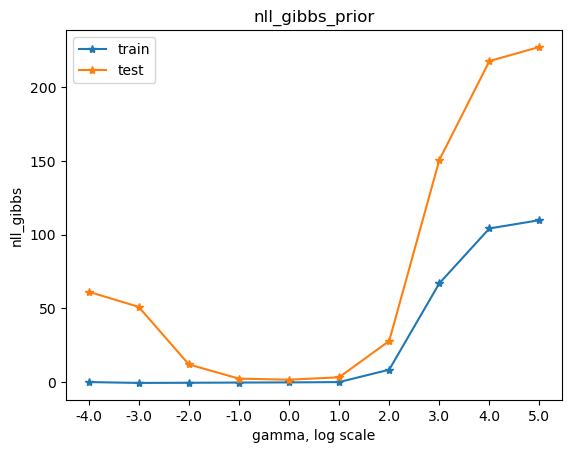

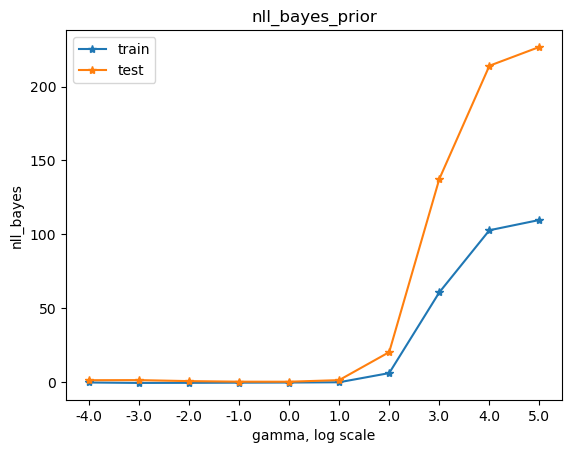

In [162]:
metric_names = ["nll_gibbs", "nll_bayes"]  # ,"mse_gibbs","mse_bayes"]
for metric_name in metric_names:
    plt.figure()
    save_name = f"{metric_name}_{tempering}"
    plt.title(save_name)
    plt.plot(
        np.arange(0, len(gammas), 1),
        result[f"{metric_name}_train"],
        marker="*",
        label="train",
    )
    plt.plot(
        np.arange(0, len(gammas), 1),
        result[f"{metric_name}_test"],
        marker="*",
        label="test",
    )
    # plt.plot(np.arange(0,len(lambs),1),nll_gibbs_test_1, marker="*", label=prior_scale_1)

    plt.xticks(np.arange(0, len(gammas), 1), np.log10(gammas))
    # plt.legend()
    if tempering == "likelihood":
        plt.xlabel("lambda, log scale")
    if tempering == "prior":
        plt.xlabel("gamma, log scale")
    plt.ylabel(metric_name)
    plt.legend()
    plt.savefig(f"./results/exact_lm_regression/main/{tempering}/{save_name}.png", dpi=300)
    plt.show()
